In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import util
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree
from scipy.cluster import hierarchy
from six import StringIO
from IPython.display import Image
import pydotplus
import plotly.express as px

## Download data

In [2]:
# Get the current working directory
directory = os.getcwd()

# Load data
directory_data = directory + '\\Data\\sfo 2018_data file_final_Weighted.xlsx'
data_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='DATA')
code_list_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='Code List')

## Get to know data

In [3]:
len(data_2018)

2809

In [4]:
data_2018.head()

,RESPNUM,CCGID,RUNID,INTDATE,DAY,GATE,BAREA,STRATA,PEAK,METH,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1844,1681,552,21,2,102,G,3,3,1,...,15,2,4,1,2,1,2,2,1,0.670484
1,1840,1678,552,21,2,102,G,3,3,1,...,15,1,5,1,5,2,2,2,1,0.670484
2,1837,1676,552,21,2,102,G,3,3,1,...,15,2,2,2,3,3,2,1,1,0.670484
3,3010,2216,613,23,4,58,D,3,2,1,...,12,1,4,2,4,3,2,2,1,1.061139
4,1838,1677,552,21,2,102,G,3,3,1,...,15,2,3,1,2,2,2,2,1,0.670484


In [5]:
data_2018.describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
count,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,...,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000
mean,1821.937700,1419.065504,14.079032,4.127447,50.647205,2.148095,2.161979,1.012460,1.880384,1414.961552,...,18.608046,1.657529,4.045568,1.448558,2.046992,1.817017,1.595586,1.541118,1.103596,0.999999
std,942.654669,861.370970,8.193408,1.692994,33.241023,0.780914,0.750427,0.125978,0.324569,1714.986966,...,26.604692,0.730039,1.864170,0.611737,1.493790,0.700515,0.678995,0.697855,0.442109,0.490976
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038
25%,1052.000000,707.000000,8.000000,3.000000,12.000000,2.000000,2.000000,1.000000,2.000000,394.000000,...,7.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.670484
50%,1869.000000,1409.000000,15.000000,4.000000,52.000000,2.000000,2.000000,1.000000,2.000000,857.000000,...,10.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.061139
75%,2594.000000,2116.000000,20.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1747.000000,...,14.000000,2.000000,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,99.000000,2.000000,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528


In [6]:
data_2018.columns

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'ARRTIME',
       'DEPTIME', 'HOWLONG', 'Q2PURP1', 'Q2PURP2', 'Q2PURP3', 'Q3GETTO1',
       'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q4BAGS', 'Q4STORE', 'Q4FOOD',
       'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD',
       'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP',
       'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL',
       'Q7ALL', 'Q8-1', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9Boarding',
       'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q9-1',
       'Q9-2', 'Q9-3', 'Q10Safe', 'Q10-1', 'Q10-2', 'Q10-3', 'Q11TSAPRE',
       'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q13COUNTY', 'Q13GETRATE',
       'Q14FIND ', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q15A', 'Q15-1', 'Q15-2',
       'Q15-3', 'N

In [7]:
data_2018.rename(columns = {'NETPRO  ':'NETPRO'}, inplace = True)
data_2018.rename(columns = {'Q14FIND ':'Q14FIND'}, inplace = True)
code_list_2018 = code_list_2018.replace('Q14FIND ', 'Q14FIND')
code_list_2018 = code_list_2018.replace('NETPRO  ', 'NETPRO')

### Remove variables

In [8]:
data_2018 = data_2018.drop(['RESPNUM', 'CCGID'], axis=1)

### Null varaibles

In [9]:
# Variable with null
columns_null = ['Q2PURP2', 'Q2PURP3', 'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9-2', 'Q9-3', 'Q10-2', 'Q10-3', 'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q15A', 'Q15-1', 'Q15-2', 'Q15-3', 'Q18CITY', 'Q18COUNTY', 'Q18ZIP', 'Q18STATE', 'Q18COUNTRY']
data_2018.isnull().sum()

RUNID      0
INTDATE    0
DAY        0
GATE       0
BAREA      0
          ..
Q23FLY     0
Q24SJC     0
Q24OAK     0
LANG       0
WEIGHT     0
Length: 98, dtype: int64

In [10]:
# Variable with hidden null as 0
columns_0 = ['Q2PURP1', 'Q4BAGS', 'Q4STORE', 'Q4FOOD', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'Q9Boarding', 'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q10Safe', 'Q10-1', 'Q11TSAPRE', 'Q13GETRATE', 'Q14FIND', 'Q14PASSTHRU', 'Q15PROBLEM',  'Q17LIVE', 'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24SJC', 'Q24OAK']
print(pd.unique(data_2018['Q24OAK']))

[2 1 0 3]


In [11]:
# Variable with hidden null as BLANK - 'Q7ALL'
data_2018.loc[data_2018['Q7ALL'] == 'BLANK', 'Q7ALL'] = 0
# Variable with hidden null as N - 'HOWLONG', 'ARRTIME', 'DEPTIME'
data_2018.loc[data_2018['HOWLONG'] == 'N', 'HOWLONG'] = 0
data_2018.loc[data_2018['ARRTIME'] == 'N', 'ARRTIME'] = 0
data_2018.loc[data_2018['DEPTIME'] == 'N', 'DEPTIME'] = 0
# Variable with hidden null as 11 - 'NETPRO'
data_2018['NETPRO'] = data_2018['NETPRO'] + 1
data_2018.loc[data_2018['NETPRO'] == 12, 'NETPRO'] = 0
# Variable with hidden null as 99 - 'HOME'
data_2018.loc[data_2018['HOME'] == 99, 'HOME'] = 0
columns_0.extend(['Q7ALL', 'HOWLONG', 'ARRTIME', 'DEPTIME', 'NETPRO', 'HOME'])

In [12]:
# Columns without null values
columns_not_null = data_2018.columns.copy().drop(columns_null + columns_0)
columns_not_null

Index(['RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA', 'STRATA', 'PEAK', 'METH',
       'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT', 'AIRLINE_CODE', 'DEST_CODE',
       'DESTGEO', 'DESTMARK', 'Q3GETTO1', 'Q9-1', 'Q13COUNTY', 'LANG',
       'WEIGHT'],
      dtype='object')

In [13]:
# Number of records after dropping all hidden null records
data_2018_not_null = data_2018.copy()
for col in columns_0 + columns_null:
    data_2018_not_null = data_2018_not_null.loc[data_2018_not_null[col] != 0]
len(data_2018_not_null)

378

### Data types

In [14]:
data_2018.dtypes

RUNID       object
INTDATE      int64
DAY          int64
GATE         int64
BAREA       object
            ...   
Q23FLY       int64
Q24SJC       int64
Q24OAK       int64
LANG         int64
WEIGHT     float64
Length: 98, dtype: object

In [15]:
data_2018 = data_2018.astype({'HOWLONG': 'float64'})

In [16]:
data_2018_obj = data_2018.select_dtypes(include=['object'])
columns_object = data_2018_obj.columns
data_2018_obj.head()

,RUNID,BAREA,AIRLINE,DESTINATION,ARRTIME,DEPTIME,Q7ALL,Q8-5,Q15A,Q18CITY,Q18COUNTY,Q18STATE,Q18COUNTRY
0,552,G,TURKISH AIRLINES,ISTANBUL,13:00:00,18:15:00,4,NaN,NaN,ISTANBUL,NaN,NaN,TURKEY
1,552,G,TURKISH AIRLINES,ISTANBUL,15:30:00,18:15:00,4,NaN,NaN,IZMIR,NaN,NaN,TURKEY
2,552,G,TURKISH AIRLINES,ISTANBUL,14:30:00,18:15:00,4,NaN,NaN,SKOPJE,NaN,NaN,MACEDONIA
3,613,D,AMERICAN,MIAMI,20:00:00,21:28:00,4,NaN,NaN,MIAMI,MIAMI-DADE COUNTY,FL,US
4,552,G,TURKISH AIRLINES,ISTANBUL,15:00:00,18:15:00,4,NaN,NaN,ISTANBUL,NaN,NaN,TURKEY


In [17]:
data_2018_num = data_2018.select_dtypes(include=['int64', 'float64'])
columns_numeric = data_2018_num.columns
data_2018_num.head()

,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,AIRLINE_CODE,DEST_CODE,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,21,2,102,3,3,1,2,80,29,27,...,15,2,4,1,2,1,2,2,1,0.670484
1,21,2,102,3,3,1,1,80,29,27,...,15,1,5,1,5,2,2,2,1,0.670484
2,21,2,102,3,3,1,1,80,29,27,...,15,2,2,2,3,3,2,1,1,0.670484
3,23,4,58,3,2,1,2,556,8,37,...,12,1,4,2,4,3,2,2,1,1.061139
4,21,2,102,3,3,1,2,80,29,27,...,15,2,3,1,2,2,2,2,1,0.670484


In [18]:
columns_numeric_nn = np.setdiff1d(columns_numeric, columns_null)
columns_numeric_nn

array(['AIRLINE_CODE', 'DAY', 'DESTGEO', 'DESTMARK', 'DEST_CODE',
       'FLIGHT', 'GATE', 'HOME', 'HOWLONG', 'INTDATE', 'LANG', 'METH',
       'NETPRO', 'PEAK', 'Q10-1', 'Q10Safe', 'Q11TSAPRE', 'Q13COUNTY',
       'Q13GETRATE', 'Q14FIND', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q17LIVE',
       'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24OAK',
       'Q24SJC', 'Q2PURP1', 'Q3GETTO1', 'Q4BAGS', 'Q4FOOD', 'Q4STORE',
       'Q4WIFI', 'Q5FIRSTTIME', 'Q5TIMESFLOWN', 'Q6LONGUSE', 'Q7AIRTRAIN',
       'Q7ART', 'Q7FOOD', 'Q7INFODOWN', 'Q7INFOUP', 'Q7LTPARKING',
       'Q7PARK', 'Q7RENTAL', 'Q7ROADS', 'Q7SCREENS', 'Q7SIGN', 'Q7STORE',
       'Q7WALKWAY', 'Q7WIFI', 'Q8-1', 'Q9-1', 'Q9AirTrain', 'Q9All',
       'Q9Boarding', 'Q9Food', 'Q9Rental', 'Q9Restroom', 'SAQ', 'STRATA',
       'WEIGHT'], dtype=object)

### Correlation

In [19]:
for i in range(0, len(columns_numeric_nn) - 1):
    for j in range(i + 1, len(columns_numeric_nn)):
        corr = data_2018[columns_numeric_nn[i]].corr(data_2018[columns_numeric_nn[j]])
        if corr > 0.7 or corr < -0.7: print(f'Correlation value {corr} between {columns_numeric_nn[i]} and {columns_numeric_nn[j]}')

Correlation value 0.7563448110220642 between DESTGEO and PEAK
Correlation value 0.7215915509820974 between Q7AIRTRAIN and Q7LTPARKING
Correlation value 0.7493259544417027 between Q7AIRTRAIN and Q7RENTAL
Correlation value 0.8842590853660256 between Q7INFODOWN and Q7INFOUP
Correlation value 0.7908336282706248 between Q7LTPARKING and Q7PARK
Correlation value 0.7454482099313201 between Q7LTPARKING and Q7RENTAL
Correlation value 0.7243145613748565 between Q7PARK and Q7ROADS
Correlation value 0.8007493317817573 between Q9AirTrain and Q9Rental


### Histograms and other plots

In [20]:
# for col in columns_numeric:
#     plt.figure()
#     sns.distplot(data_2018[col])

In [21]:
data_2018.groupby('Q21Gender')['Q21Gender'].count()

Q21Gender
0     170
1    1217
2    1414
3       8
Name: Q21Gender, dtype: int64

In [22]:
a = data_2018.groupby('DEST_CODE')['DEST_CODE'].count()
a[a > 100]

DEST_CODE
14    111
23    104
34    215
47    151
Name: DEST_CODE, dtype: int64

In [23]:
data_2018.groupby('DESTGEO')['DESTGEO'].count()

DESTGEO
1    975
2    498
3    281
4    220
5     29
6    401
7     79
8    260
9     66
Name: DESTGEO, dtype: int64

<AxesSubplot:xlabel='Q22Income', ylabel='Density'>

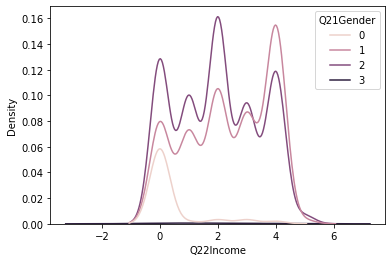

In [24]:
sns.kdeplot(x = data_2018['Q22Income'], hue = data_2018['Q21Gender'])

<AxesSubplot:xlabel='Q7WIFI', ylabel='Density'>

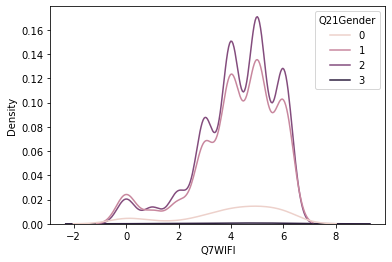

In [25]:
sns.kdeplot(x = data_2018['Q7WIFI'], hue = data_2018['Q21Gender'])

## New dataset with only numeric column

In [26]:
# Select columns
data_2018_numeric = data_2018_num[columns_numeric_nn[columns_numeric_nn != 'WEIGHT']]
data_2018_numeric.head()

,AIRLINE_CODE,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,INTDATE,...,Q8-1,Q9-1,Q9AirTrain,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,SAQ,STRATA
0,29,2,7,4,27,80,102,15,315.0,21,...,0,0,4,4,5,6,3,4,2,3
1,29,2,7,4,27,80,102,15,165.0,21,...,0,0,6,3,4,6,6,2,1,3
2,29,2,7,4,27,80,102,15,225.0,21,...,0,0,0,4,5,3,0,4,1,3
3,8,4,2,4,37,556,58,12,88.0,23,...,0,0,6,4,5,4,6,0,2,3
4,29,2,7,4,27,80,102,15,195.0,21,...,0,0,6,4,5,5,6,3,2,3


In [27]:
data_2018_numeric.isnull().sum()

AIRLINE_CODE    0
DAY             0
DESTGEO         0
DESTMARK        0
DEST_CODE       0
               ..
Q9Food          0
Q9Rental        0
Q9Restroom      0
SAQ             0
STRATA          0
Length: 63, dtype: int64

In [28]:
# Standardisation
stand_data_numeric = util.standarisation_data(data_2018_numeric)

## Estimate k value

### Elbow plot

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\

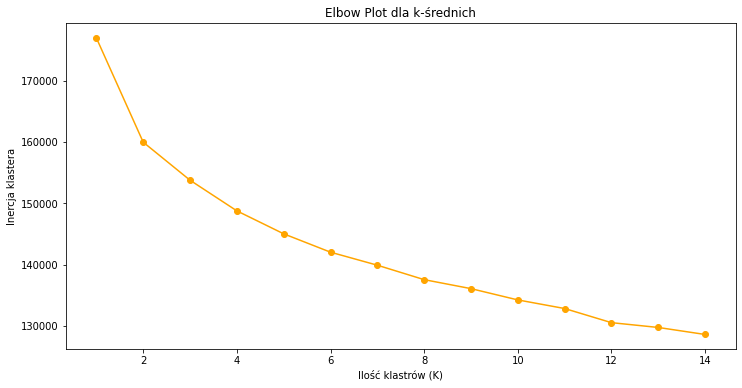

In [29]:
util.find_best_clusters(stand_data_numeric, 15)

### Dendrogram

In [30]:
# Method - Ward
clusters = hierarchy.linkage(stand_data_numeric, method="ward")

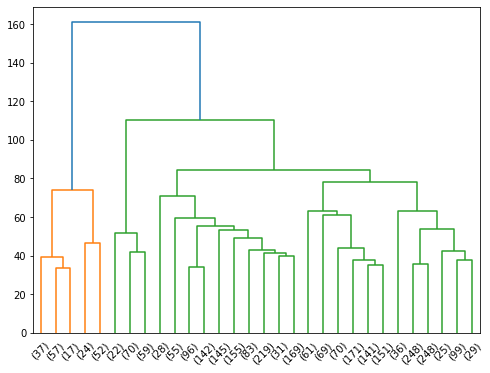

In [31]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters, truncate_mode='lastp')
plt.savefig('results/plots/dendrogram.png', transparent = True)

In [32]:
data_2018_numeric

,AIRLINE_CODE,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,INTDATE,...,Q8-1,Q9-1,Q9AirTrain,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,SAQ,STRATA
0,29,2,7,4,27,80,102,15,315.0,21,...,0,0,4,4,5,6,3,4,2,3
1,29,2,7,4,27,80,102,15,165.0,21,...,0,0,6,3,4,6,6,2,1,3
2,29,2,7,4,27,80,102,15,225.0,21,...,0,0,0,4,5,3,0,4,1,3
3,8,4,2,4,37,556,58,12,88.0,23,...,0,0,6,4,5,4,6,0,2,3
4,29,2,7,4,27,80,102,15,195.0,21,...,0,0,6,4,5,5,6,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,29,2,7,4,27,80,102,15,135.0,21,...,102,0,4,4,4,4,4,4,1,3
2805,7,6,1,2,55,744,2,10,80.0,11,...,0,0,6,4,4,5,6,4,2,3
2806,3,6,4,4,70,750,101,13,205.0,18,...,0,0,5,3,5,5,5,5,2,2
2807,30,7,3,2,30,5454,76,10,120.0,5,...,9,0,6,3,3,3,0,3,2,2


## K-means on data_2018_numeric

In [33]:
util.kmeans_data(data_2018, stand_data_numeric, 3, 'cluster_k_num')

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
cluster_k_num_0 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_k_num', 0, columns_null, columns_0).rename(columns={'Value': 'Cluster_0'})
cluster_k_num_1 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_k_num', 1, columns_null, columns_0).rename(columns={'Value': 'Cluster_1'})
cluster_k_num_2 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_k_num', 2, columns_null, columns_0).rename(columns={'Value': 'Cluster_2'})
cluster_k_num_merged = cluster_k_num_0.merge(cluster_k_num_1, on='Variable').merge(cluster_k_num_2, on='Variable')

--- Cluster report ---

Size of the cluster: 1194
Mean Weight assigned to each record to proportionally represent SFO passengers: 1.19

- Survey -
Mode of Day of Interview: Thursday
Mode of Method of collecting: At gate
Mode of Survey Administration: Self Administered 
Mode of Language of questionaire: English

- Flight -
Mode of Strata: PM (Flights departing after 5 pm)
Mode of Peak: Domestic offpeak – domestic flights departing before 8 am or after 1 pm
Mode of Airline Used : UNITED
Mode of Assigned code providing area of the world for which flight is destined  (See map for US Regions)
: United States – West  (AK, HI, western and most of mountain time zone)
Mode of Market size of the destination airport. (Based on airport’s average daily number of passengers): Hub – 100,000 passengers/day or more
Mode of Trip Purpose: Pleasure/Vacation/Recreation
Mode of From which county did you leave today?: San Francisco
Mean [calculated] Length of time from respondent arrival to flight departure 

In [35]:
cluster_k_num_merged.to_excel('results/xlsx/cluster_k_num_merged.xlsx', index=False)

## Dimention reduction

### Expert selection of variables

In [36]:
columns_expert_2018 = ['DESTGEO', 'DEST_CODE', 'DESTMARK', 'Q2PURP1', 'HOWLONG', 'HOME', 'PEAK', 'METH', 'SAQ', 'Q10Safe', 'Q13GETRATE', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q19Clear', 'Q22Income', 'Q4BAGS', 'Q4FOOD', 'Q4STORE', 'Q4WIFI', 'Q11TSAPRE', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q23FLY', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'NETPRO', 'Q9AirTrain', 'Q9All', 'Q9Boarding', 'Q9Food', 'Q9Rental', 'Q9Restroom', 'Q9-1']
data_2018_expert = data_2018[columns_expert_2018]
data_2018_expert.head()

#columns_expert_2016 = ['DESTGEO', 'DEST CODE', 'DESTMARK', 'HOWLONG', 'HOME', 'METHOD', 'PEAK', 'Q11TSAPRE', 'Q10SAFE', 'Q13GETRATE', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q21INCME', 'Q22FLY', 'Q2PURP1', 'Q4BAGS', 'Q4FOOD', 'Q4STORE', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAYS', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8COM', 'Q9AIRTRAIN', 'Q9ALL', 'Q9BOARDING', 'Q9FOOD', 'Q9RENTAL', 'Q9RESTROOM', 'Q9COM', 'SAQ']

,DESTGEO,DEST_CODE,DESTMARK,Q2PURP1,HOWLONG,HOME,PEAK,METH,SAQ,Q10Safe,...,Q7RENTAL,Q8-1,NETPRO,Q9AirTrain,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,Q9-1
0,7,27,4,2,315.0,15,3,1,2,4,...,2,0,8,4,4,5,6,3,4,0
1,7,27,4,5,165.0,15,3,1,1,4,...,6,0,8,6,3,4,6,6,2,0
2,7,27,4,3,225.0,15,3,1,1,4,...,0,0,9,0,4,5,3,0,4,0
3,2,37,4,1,88.0,12,2,1,2,5,...,6,0,9,6,4,5,4,6,0,0
4,7,27,4,1,195.0,15,3,1,2,5,...,6,0,9,6,4,5,5,6,3,0


In [37]:
stand_data_expert = util.standarisation_data(data_2018_expert)

### PCA

In [38]:
pca_data = PCA(n_components=len(data_2018_numeric.columns), random_state=300)
principalComponents = pca_data.fit_transform(stand_data_numeric)

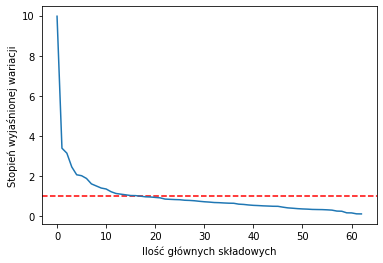

In [39]:
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('Ilość głównych składowych')
plt.ylabel('Stopień wyjaśnionej wariacji')
plt.plot(pca_data.explained_variance_)
plt.savefig('results/plots/kaiser.png', transparent=True)
plt.show()

In [40]:
pca_data = PCA(n_components=18)
principalComponents = pca_data.fit_transform(stand_data_numeric)

print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))

Explained variation per principal component: [0.15820355 0.05377122 0.04983637 0.03893426 0.03273283 0.03199781
 0.02981099 0.0255202  0.02385765 0.02221299 0.0214647  0.01925532
 0.01777017 0.01727337 0.01660215 0.01621614 0.01604199 0.01565495]


In [41]:
sum(pca_data.explained_variance_ratio_)

0.6071566414769625

In [42]:
data_2018_pca = pd.DataFrame(data = principalComponents,
                             columns = ['principal_component'+str(i) for i in range(1, 19)])
data_2018_pca.head()

,principal_component1,principal_component2,principal_component3,principal_component4,principal_component5,principal_component6,principal_component7,principal_component8,principal_component9,principal_component10,principal_component11,principal_component12,principal_component13,principal_component14,principal_component15,principal_component16,principal_component17,principal_component18
0,-0.361782,0.560454,2.557378,0.194461,0.319948,2.062802,1.228994,-1.750781,0.746593,1.406075,-1.520838,-0.911619,0.463858,1.903740,1.160027,-0.701688,-0.036275,0.008931
1,-1.751091,0.854493,1.728233,-2.830989,-1.277924,2.412328,1.180079,0.190652,-0.253688,0.745473,-0.135296,-1.016799,-0.360052,1.554253,1.596726,-1.530924,1.108038,-1.053967
2,6.996384,-1.030163,2.035747,2.580632,1.075256,3.004646,1.003281,-1.580791,0.070277,2.692652,2.306596,-1.884477,-0.124301,1.064525,1.896075,1.359950,-0.162918,-2.259987
3,-0.483682,-0.445107,1.859603,-1.979965,0.522949,-1.621099,-0.290845,-0.969817,1.319977,-0.841420,-0.344472,-0.622562,-0.735529,0.735385,0.579194,-0.438535,-1.029534,-0.099519
4,-0.702140,0.399854,3.279184,-0.713576,-0.244286,-1.383146,0.883115,-0.654545,0.010136,0.592902,-1.866596,-0.704977,0.008403,1.775010,1.847271,-0.204956,-0.150553,-0.151904


###  Decision Tree

In [43]:
data_2018_numeric.columns

Index(['AIRLINE_CODE', 'DAY', 'DESTGEO', 'DESTMARK', 'DEST_CODE', 'FLIGHT',
       'GATE', 'HOME', 'HOWLONG', 'INTDATE', 'LANG', 'METH', 'NETPRO', 'PEAK',
       'Q10-1', 'Q10Safe', 'Q11TSAPRE', 'Q13COUNTY', 'Q13GETRATE', 'Q14FIND',
       'Q14PASSTHRU', 'Q15PROBLEM', 'Q17LIVE', 'Q19Clear', 'Q20Age',
       'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24OAK', 'Q24SJC', 'Q2PURP1',
       'Q3GETTO1', 'Q4BAGS', 'Q4FOOD', 'Q4STORE', 'Q4WIFI', 'Q5FIRSTTIME',
       'Q5TIMESFLOWN', 'Q6LONGUSE', 'Q7AIRTRAIN', 'Q7ART', 'Q7FOOD',
       'Q7INFODOWN', 'Q7INFOUP', 'Q7LTPARKING', 'Q7PARK', 'Q7RENTAL',
       'Q7ROADS', 'Q7SCREENS', 'Q7SIGN', 'Q7STORE', 'Q7WALKWAY', 'Q7WIFI',
       'Q8-1', 'Q9-1', 'Q9AirTrain', 'Q9All', 'Q9Boarding', 'Q9Food',
       'Q9Rental', 'Q9Restroom', 'SAQ', 'STRATA'],
      dtype='object')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data_2018_numeric,
                                                    data_2018.cluster_k_num, test_size=0.3, random_state=1)

In [45]:
clf = DecisionTreeClassifier(max_depth=5, random_state=300)
clf = clf.fit(X_train, y_train)

In [46]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7781731909845789


In [47]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\\bin'

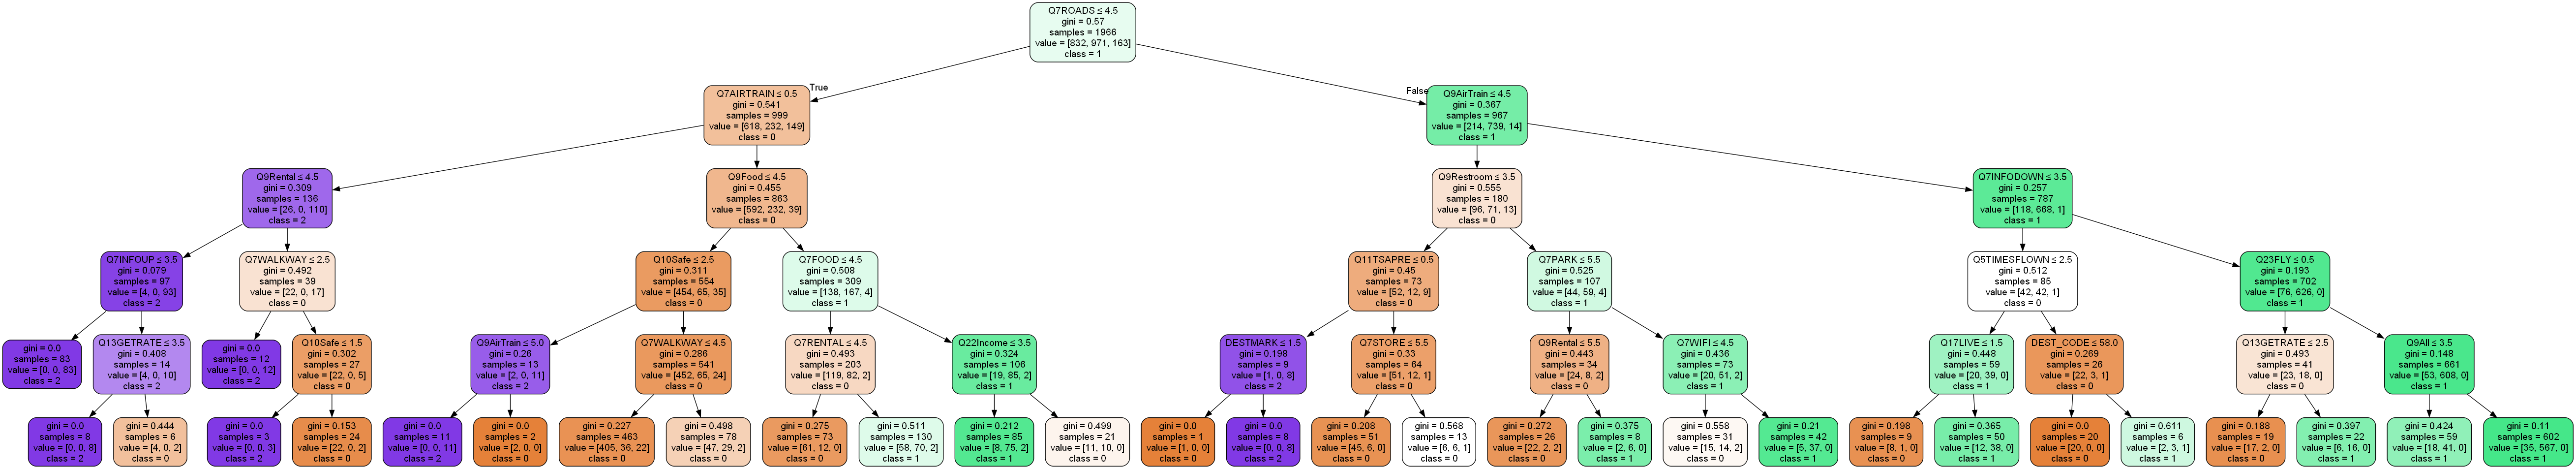

In [48]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = data_2018_numeric.columns,
                class_names=['0', '1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('results/plots/tree_graph.png')
Image(graph.create_png())

In [49]:
text_representation = tree.export_text(clf, feature_names=data_2018_numeric.columns)
print(text_representation)

|--- Q7ROADS <= 4.50
|   |--- Q7AIRTRAIN <= 0.50
|   |   |--- Q9Rental <= 4.50
|   |   |   |--- Q7INFOUP <= 3.50
|   |   |   |   |--- class: 2
|   |   |   |--- Q7INFOUP >  3.50
|   |   |   |   |--- Q13GETRATE <= 3.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Q13GETRATE >  3.50
|   |   |   |   |   |--- class: 0
|   |   |--- Q9Rental >  4.50
|   |   |   |--- Q7WALKWAY <= 2.50
|   |   |   |   |--- class: 2
|   |   |   |--- Q7WALKWAY >  2.50
|   |   |   |   |--- Q10Safe <= 1.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Q10Safe >  1.50
|   |   |   |   |   |--- class: 0
|   |--- Q7AIRTRAIN >  0.50
|   |   |--- Q9Food <= 4.50
|   |   |   |--- Q10Safe <= 2.50
|   |   |   |   |--- Q9AirTrain <= 5.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Q9AirTrain >  5.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Q10Safe >  2.50
|   |   |   |   |--- Q7WALKWAY <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Q7WALKWAY >  4.50
|   |   |   |   |   |

In [50]:
key_feature = pd.unique(util.used_feature(_tree, clf, data_2018_numeric.columns))
key_feature

array(['Q7ROADS', 'Q7AIRTRAIN', 'Q9Rental', 'Q7INFOUP', 'Q13GETRATE',
       'Q7WALKWAY', 'Q10Safe', 'Q9Food', 'Q9AirTrain', 'Q7FOOD',
       'Q7RENTAL', 'Q22Income', 'Q9Restroom', 'Q11TSAPRE', 'DESTMARK',
       'Q7STORE', 'Q7PARK', 'Q7WIFI', 'Q7INFODOWN', 'Q5TIMESFLOWN',
       'Q17LIVE', 'DEST_CODE', 'Q23FLY', 'Q9All'], dtype=object)

In [51]:
data_2018_tree = data_2018_numeric[key_feature]
stand_data_tree = util.standarisation_data(data_2018_tree)

## Segmentation

### EM on data_2018_expert

In [52]:
util.em_data(data_2018, stand_data_expert, 3, 'cluster_em_exp')

In [53]:
cluster_em_exp_0 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_em_exp', 0, columns_null, columns_0).rename(columns={'Value': 'Cluster_0'})
cluster_em_exp_1 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_em_exp', 1, columns_null, columns_0).rename(columns={'Value': 'Cluster_1'})
cluster_em_exp_2 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_em_exp', 2, columns_null, columns_0).rename(columns={'Value': 'Cluster_2'})
cluster_em_exp_merged = cluster_em_exp_0.merge(cluster_em_exp_1, on='Variable').merge(cluster_em_exp_2, on='Variable')

--- Cluster report ---

Size of the cluster: 1427
Mean Weight assigned to each record to proportionally represent SFO passengers: 1.25

- Survey -
Mode of Day of Interview: Wednesday
Mode of Method of collecting: At gate
Mode of Survey Administration: Self Administered 
Mode of Language of questionaire: English

- Flight -
Mode of Strata: PM (Flights departing after 5 pm)
Mode of Peak: Domestic offpeak – domestic flights departing before 8 am or after 1 pm
Mode of Airline Used : UNITED
Mode of Assigned code providing area of the world for which flight is destined  (See map for US Regions)
: United States – West  (AK, HI, western and most of mountain time zone)
Mode of Market size of the destination airport. (Based on airport’s average daily number of passengers): Hub – 100,000 passengers/day or more
Mode of Trip Purpose: Pleasure/Vacation/Recreation
Mode of From which county did you leave today?: San Francisco
Mean [calculated] Length of time from respondent arrival to flight departure

In [54]:
cluster_em_exp_merged.to_excel('results/xlsx/cluster_em_exp_merged.xlsx', index=False)

### EM on data_2018_pca

In [55]:
util.em_data(data_2018, data_2018_pca, 3, 'cluster_em_pca')

In [56]:
cluster_em_pca_0 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_em_pca', 0, columns_null, columns_0).rename(columns={'Value': 'Cluster_0'})
cluster_em_pca_1 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_em_pca', 1, columns_null, columns_0).rename(columns={'Value': 'Cluster_1'})
cluster_em_pca_2 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_em_pca', 2, columns_null, columns_0).rename(columns={'Value': 'Cluster_2'})
cluster_em_pca_merged = cluster_em_pca_0.merge(cluster_em_pca_1, on='Variable').merge(cluster_em_pca_2, on='Variable')

--- Cluster report ---

Size of the cluster: 1864
Mean Weight assigned to each record to proportionally represent SFO passengers: 1.22

- Survey -
Mode of Day of Interview: Tuesday
Mode of Method of collecting: At gate
Mode of Survey Administration: Self Administered 
Mode of Language of questionaire: English

- Flight -
Mode of Strata: PM (Flights departing after 5 pm)
Mode of Peak: Domestic offpeak – domestic flights departing before 8 am or after 1 pm
Mode of Airline Used : UNITED
Mode of Assigned code providing area of the world for which flight is destined  (See map for US Regions)
: United States – West  (AK, HI, western and most of mountain time zone)
Mode of Market size of the destination airport. (Based on airport’s average daily number of passengers): Hub – 100,000 passengers/day or more
Mode of Trip Purpose: Pleasure/Vacation/Recreation
Mode of From which county did you leave today?: San Francisco
Mean [calculated] Length of time from respondent arrival to flight departure (

In [57]:
cluster_em_pca_merged.to_excel('results/xlsx/cluster_em_pca_merged.xlsx', index=False)

### K-means on data_2018_tree

In [58]:
util.kmeans_data(data_2018, stand_data_tree, 3, 'cluster_k_tree')

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
cluster_k_tree_0 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_k_tree', 0, columns_null, columns_0).rename(columns={'Value': 'Cluster_0'})
cluster_k_tree_1 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_k_tree', 1, columns_null, columns_0).rename(columns={'Value': 'Cluster_1'})
cluster_k_tree_2 = util.cluster_analysis(data_2018, code_list_2018, 'cluster_k_tree', 2, columns_null, columns_0).rename(columns={'Value': 'Cluster_2'})
cluster_k_tree_merged = cluster_k_tree_0.merge(cluster_k_tree_1, on='Variable').merge(cluster_k_tree_2, on='Variable')

--- Cluster report ---

Size of the cluster: 1036
Mean Weight assigned to each record to proportionally represent SFO passengers: 1.19

- Survey -
Mode of Day of Interview: Thursday
Mode of Method of collecting: At gate
Mode of Survey Administration: Self Administered 
Mode of Language of questionaire: English

- Flight -
Mode of Strata: PM (Flights departing after 5 pm)
Mode of Peak: Domestic offpeak – domestic flights departing before 8 am or after 1 pm
Mode of Airline Used : UNITED
Mode of Assigned code providing area of the world for which flight is destined  (See map for US Regions)
: United States – West  (AK, HI, western and most of mountain time zone)
Mode of Market size of the destination airport. (Based on airport’s average daily number of passengers): Hub – 100,000 passengers/day or more
Mode of Trip Purpose: Pleasure/Vacation/Recreation
Mode of From which county did you leave today?: San Francisco
Mean [calculated] Length of time from respondent arrival to flight departure 

In [60]:
cluster_k_tree_merged.to_excel('results/xlsx/cluster_k_tree_merged.xlsx', index=False)

## Visualisation

In [61]:
# Add new variable
data_2018['Q7MEAN'] = data_2018.loc[:, ['Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL']].mean(axis=1)

In [79]:
data_2018_part = data_2018[(data_2018['HOWLONG'] != 0) & (data_2018['Q20Age'] != 0)]
data_2018_part['cluster_em_pca'] = data_2018_part['cluster_em_pca'].replace({
                                                                            0: 1,
                                                                            1: 3,
                                                                            2: 2
                                                                        })
figure = px.scatter_3d(data_2018_part,
                    color='cluster_em_pca',
                    x="HOWLONG",
                    y="Q7MEAN",
                    z="Q20Age",
                    category_orders = {"Segment": ["1", "2", "3"]},
                    labels={'cluster_em_pca': 'Segment'}
                    )

figure.update_layout(
    scene=dict(
        xaxis_title='Czas oczekiwania',
        yaxis_title='Ocena SFO',
        zaxis_title='Wiek'
    )
)
figure.show()

<ipython-input-79-b609754ce716>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
data_2018_part = data_2018[(data_2018['HOWLONG'] != 0) & (data_2018['Q9All'] != 0)]
data_2018_part['cluster_em_pca'] = data_2018_part['cluster_em_pca'].replace({
                                                                            0: 1,
                                                                            1: 3,
                                                                            2: 2
                                                                        })
figure = px.scatter_3d(data_2018_part,
                    color='cluster_em_pca',
                    x="HOWLONG",
                    y="Q7MEAN",
                    z="Q9All",
                    category_orders = {"Cluster": ["1", "2", "3"]},
                    labels={'cluster_em_pca': 'Segment'}
                    )

figure.update_layout(
    scene=dict(
        xaxis_title='Czas oczekiwania',
        yaxis_title='Ocena SFO',
        zaxis_title='Ocena czystości'
    )
)
figure.show()

<ipython-input-78-5bd8d7dd7956>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



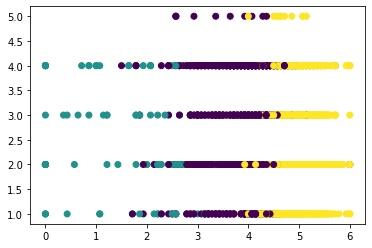

In [64]:
data_2018_part = data_2018[data_2018['Q22Income'] != 0]
plt.scatter(data_2018_part['Q7MEAN'],
            data_2018_part['Q22Income'],
            c = data_2018_part["cluster_k_tree"])

<AxesSubplot:xlabel='Q2PURP1', ylabel='Density'>

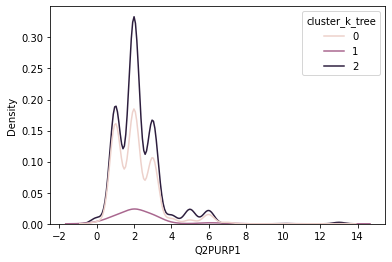

In [65]:
sns.kdeplot(x = data_2018['Q2PURP1'], hue = data_2018['cluster_k_tree'])